# Lista 8

Zadanie (Proces ryzyka)
Kapitał firmy ubezpieczeniowej jest zadany wzorem:
$R(t) = r_0 + p(t) − \sum_{i=1}^{N_t} X_i$,
gdzie $N_t$
jest procesem liczącym (tutaj jednorodnym procesem Poissona o intensywności λ, ale może być też inny proces odnowy), $X_i$ to wielkości szkód (np. z rozkładu gamma, Pareto, Weibulla), $r_0$ to kapitał początkowy, a $p(t)$ to funkcja zysków.
Stwórz symulację takiego procesu, która zatrzymuje się przy uderzeniu w 0; funkcja $p(t)$ oraz rozkład zmiennych $X_i$ powinny być wprowadzane przez użytkownika.

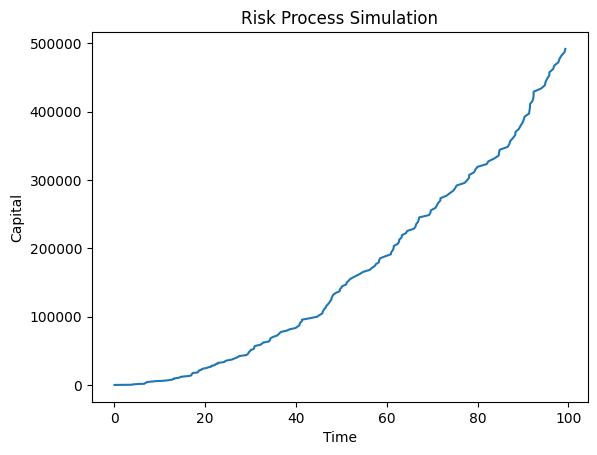

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, pareto, weibull_min

def simulate_risk_process(r0, p, claim_distribution, claim_params, lambda_, max_time=100):
    t = 0
    capital = r0
    time_points = [t]
    capital_values = [capital]
    while capital > 0 and t < max_time:
        # Time until next claim
        interarrival_time = np.random.exponential(1 / lambda_)
        t += interarrival_time
        
        # Check if the process should stop due to time limit
        if t >= max_time:
            break
        
        # Claim size
        if claim_distribution == 'gamma':
            claim_size = gamma.rvs(*claim_params)
        elif claim_distribution == 'pareto':
            claim_size = pareto.rvs(*claim_params)
        elif claim_distribution == 'weibull':
            claim_size = weibull_min.rvs(*claim_params)
        elif claim_distribution == 'expon':
            k = claim_params[0]
            claim_size = np.random.exponential(1/k)
        else:
            raise ValueError("Unsupported claim distribution.")
        
        # Update capital
        capital += p(t) - claim_size
        time_points.append(t)
        capital_values.append(capital)
    
    return time_points, capital_values

r0 = 100

def p(t):
    c = 50
    return c*t  

claim_distribution = 'expon'
claim_params = (1/20, 0) 

lambda_ = 2

time_points, capital_values = simulate_risk_process(r0, p, claim_distribution, claim_params, lambda_, max_time=100)

plt.plot(time_points, capital_values)
plt.xlabel('Time')
plt.ylabel('Capital')
plt.title('Risk Process Simulation')
plt.show()


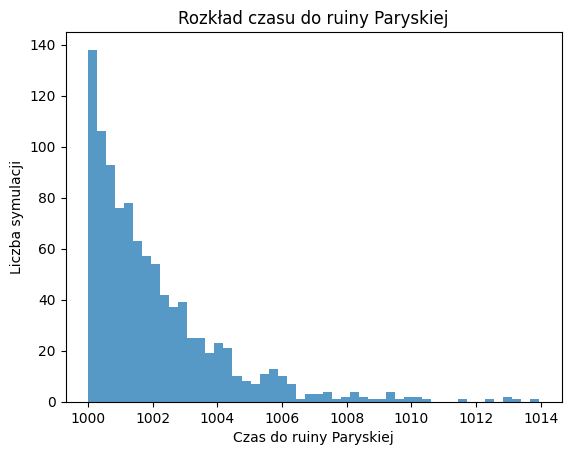

In [12]:
def simulate_parisian_ruin(r0, c, k, lambda_exp, lambda_poisson, T, max_time=1000, num_simulations=1000):
    ruin_times = []
    
    for _ in range(num_simulations):
        t = 0
        R_t = r0
        time_below_zero = 0
        
        while time_below_zero < T and t < max_time:
            t += np.random.exponential(1 / lambda_poisson)  # czas do kolejnego zdarzenia Poissona
            p_t = c * t
            X_i = np.random.exponential(1 / lambda_exp)
            R_t = r0 + p_t - X_i
            
            if R_t <= 0:
                time_below_zero += 1
            else:
                time_below_zero = 0
        
        ruin_times.append(t)
    
    return ruin_times

# Parametry symulacji
T = 10
r0 = 100
c = 5
k = 1
lambda_exp = 0.5
lambda_poisson = 0.5

# Symulacja
ruin_times_parisian = simulate_parisian_ruin(r0, c, k, lambda_exp, lambda_poisson, T)

# Wizualizacja
plt.hist(ruin_times_parisian, bins=50, alpha=0.75)
plt.xlabel('Czas do ruiny Paryskiej')
plt.ylabel('Liczba symulacji')
plt.title('Rozkład czasu do ruiny Paryskiej')
plt.show()
